In [1]:
import struct
import numpy as np

def read_complex_matrix_binary(file_path):
    with open(file_path, 'rb') as f:
        # Read rows and cols (as 4-byte integers)
        rows, cols = struct.unpack('ii', f.read(8))
        
        # Read all remaining bytes (complex numbers)
        buffer = f.read()
        
        # Calculate number of complex numbers
        num_complex = len(buffer) // 8  # 16 bytes per complex (2 doubles)
        if num_complex != rows * cols:
            raise ValueError("Data length mismatch")
        
        # Unpack into list of complex numbers
        complex_data = [
            complex(*struct.unpack('ff', buffer[i*8:(i+1)*8])) 
            for i in range(num_complex)
        ]
        
        # # Reshape into matrix
        # matrix = [
        #     complex_data[i*cols : (i+1)*cols] 
        #     for i in range(rows)
        # ]
        matrix = np.array(complex_data, dtype = np.complex64)
        matrix = np.reshape(matrix, (cols, rows)).transpose()
    return matrix

# Example usage
matrix = read_complex_matrix_binary("/home/starman/mat_alm_full.dat")
# print(matrix)
rhs = read_complex_matrix_binary("/home/starman/rhs_alm_722.dat")

In [2]:
matrix_abs = np.abs(matrix)

In [1]:
import matplotlib.pyplot as plt

plt.matshow(np.log(matrix_abs+1))

NameError: name 'np' is not defined

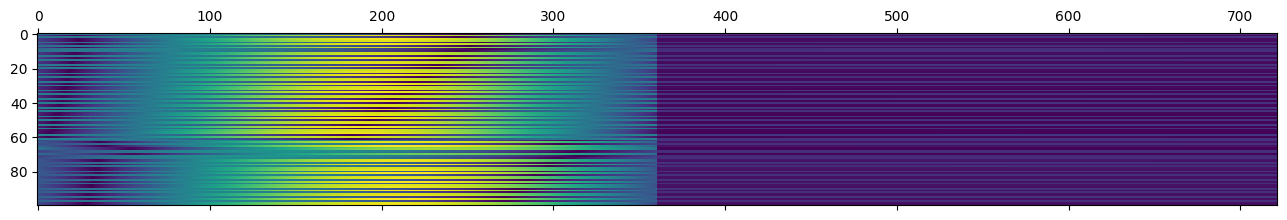

In [20]:
rhs_abs = np.abs(rhs)
plt.matshow(np.log(1+rhs_abs)[:100,:])

In [9]:
import matplotlib.pyplot as plt
# Compute singular values
U, s, Vh = np.linalg.svd(rhs[:,:361], full_matrices=False)

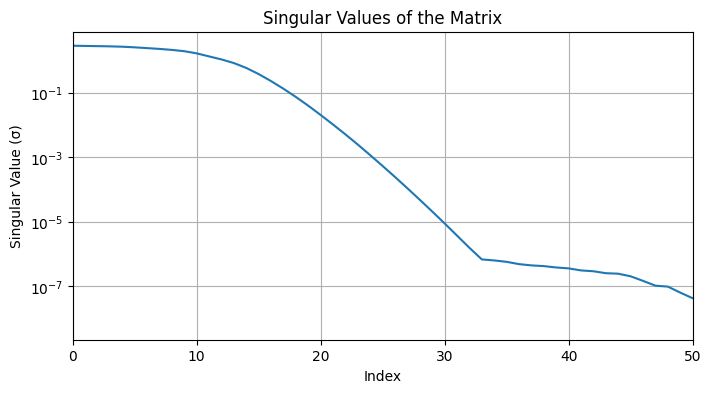

In [15]:
# Plot singular values
plt.figure(figsize=(8, 4))
plt.plot(s, linewidth=1.5)
plt.title('Singular Values of the Matrix')
plt.xlabel('Index')
plt.xlim(0,50)
plt.semilogy()
plt.ylabel('Singular Value (σ)')
plt.grid(True)
plt.show()

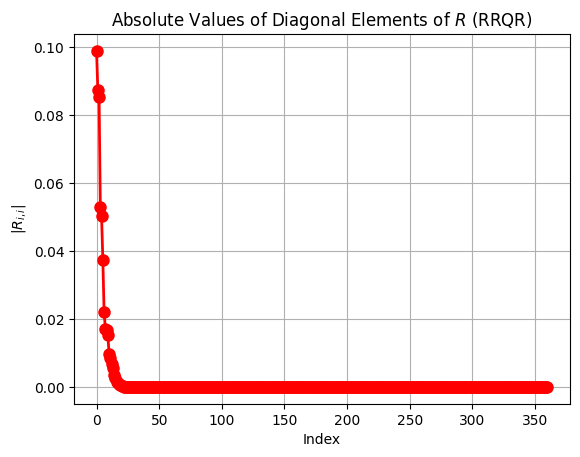

In [29]:
import scipy as scp
Q, R, P = scp.linalg.qr(rhs[:361], pivoting=True)
diag_abs = np.abs(R.diagonal())
plt.plot(diag_abs, 'ro-', linewidth=2, markersize=8)
plt.title('Absolute Values of Diagonal Elements of $R$ (RRQR)')
plt.xlabel('Index')
plt.ylabel('$|R_{i,i}|$')
plt.grid(True)
plt.show()

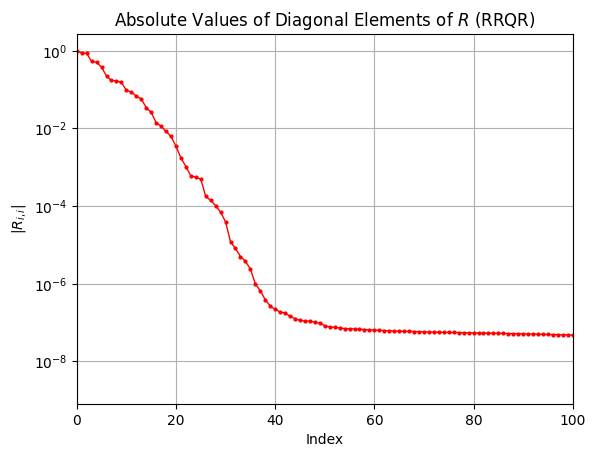

In [32]:
plt.plot(diag_abs/np.max(diag_abs), 'ro-', linewidth=1, markersize=2)
plt.title('Absolute Values of Diagonal Elements of $R$ (RRQR)')
plt.xlabel('Index')
plt.semilogy()
plt.xlim(0,100)
plt.ylabel('$|R_{i,i}|$')
plt.grid(True)
plt.show()